In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='_luvRaU4DC0GXxMIlvYduyCt2hT0juAlveE8XsGXA4ET',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'tedtalk01-donotdelete-pr-mfxjjxnnhn8xfz'
object_key = '_ted_talks.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head(10)



,talk_id,title,speaker,recorded_date,published_date,event,duration,views,likes
0,1,Averting the climate crisis,Al Gore,2006-02-25,2006-06-27,TED2006,957,3681537,110000
1,7,Simplicity sells,David Pogue,2006-02-24,2006-06-27,TED2006,1266,2012797,60000
2,53,Greening the ghetto,Majora Carter,2006-02-26,2006-06-27,TED2006,1096,3006315,90000
3,92,The best stats you've ever seen,Hans Rosling,2006-02-22,2006-06-27,TED2006,1176,15432904,462000
4,66,Do schools kill creativity?,Sir Ken Robinson,2006-02-25,2006-06-27,TED2006,1151,73935964,2200000
5,86,Letting go of God,Julia Sweeney,2006-02-24,2006-07-10,TED2006,978,4836214,145000
6,49,Behind the design of Seattle's library,Joshua Prince-Ramus,2006-02-23,2006-07-10,TED2006,1184,1261975,37000
7,71,A life of purpose,Rick Warren,2006-02-25,2006-07-18,TED2006,1248,4300620,129000
8,94,Let's teach religion -- all religion -- in sch...,Dan Dennett,2006-02-02,2006-07-18,TED2006,1471,4227594,126000
9,54,My wish: A call for open-source architecture,Cameron Sinclair,2006-02-26,2006-07-25,TED2006,1394,1372030,41000


In [3]:
df.shape

(5701, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5701 entries, 0 to 5700
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   talk_id         5701 non-null   int64 
 1   title           5701 non-null   object
 2   speaker         5700 non-null   object
 3   recorded_date   5699 non-null   object
 4   published_date  5701 non-null   object
 5   event           5700 non-null   object
 6   duration        5701 non-null   int64 
 7   views           5701 non-null   int64 
 8   likes           5701 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 401.0+ KB


In [5]:
df.isnull().sum()

talk_id           0
title             0
speaker           1
recorded_date     2
published_date    0
event             1
duration          0
views             0
likes             0
dtype: int64

In [6]:
df['speaker'].fillna('Unknown', inplace=True)
df['event'].fillna('Unknown Event', inplace=True)
df['recorded_date'].fillna('2000-01-01', inplace=True)

df.isnull().sum()

talk_id           0
title             0
speaker           0
recorded_date     0
published_date    0
event             0
duration          0
views             0
likes             0
dtype: int64

In [7]:
df['recorded_date'] = pd.to_datetime(df['recorded_date'])
df['published_date'] = pd.to_datetime(df['published_date'])

df.head()

,talk_id,title,speaker,recorded_date,published_date,event,duration,views,likes
0,1,Averting the climate crisis,Al Gore,2006-02-25,2006-06-27,TED2006,957,3681537,110000
1,7,Simplicity sells,David Pogue,2006-02-24,2006-06-27,TED2006,1266,2012797,60000
2,53,Greening the ghetto,Majora Carter,2006-02-26,2006-06-27,TED2006,1096,3006315,90000
3,92,The best stats you've ever seen,Hans Rosling,2006-02-22,2006-06-27,TED2006,1176,15432904,462000
4,66,Do schools kill creativity?,Sir Ken Robinson,2006-02-25,2006-06-27,TED2006,1151,73935964,2200000


In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5701 entries, 0 to 5700
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   talk_id         5701 non-null   int64         
 1   title           5701 non-null   object        
 2   speaker         5701 non-null   object        
 3   recorded_date   5701 non-null   datetime64[ns]
 4   published_date  5701 non-null   datetime64[ns]
 5   event           5701 non-null   object        
 6   duration        5701 non-null   int64         
 7   views           5701 non-null   int64         
 8   likes           5701 non-null   int64         
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 401.0+ KB


In [10]:
df.shape

(5701, 9)

In [11]:
df.dtypes

talk_id                    int64
title                     object
speaker                   object
recorded_date     datetime64[ns]
published_date    datetime64[ns]
event                     object
duration                   int64
views                      int64
likes                      int64
dtype: object

In [12]:
df.describe()

,talk_id,duration,views,likes
count,5701.000000,5701.000000,5.701000e+03,5.701000e+03
mean,26577.133135,706.021751,2.147123e+06,6.386154e+04
std,30530.857641,519.196825,3.711874e+06,1.098655e+05
min,1.000000,60.000000,4.560000e+02,1.300000e+01
25%,1660.000000,354.000000,6.859920e+05,2.000000e+04
50%,10368.000000,679.000000,1.405696e+06,4.200000e+04
75%,51783.000000,924.000000,2.189406e+06,6.500000e+04
max,98843.000000,20404.000000,7.393596e+07,2.200000e+06


In [13]:
df.head()

,talk_id,title,speaker,recorded_date,published_date,event,duration,views,likes
0,1,Averting the climate crisis,Al Gore,2006-02-25,2006-06-27,TED2006,957,3681537,110000
1,7,Simplicity sells,David Pogue,2006-02-24,2006-06-27,TED2006,1266,2012797,60000
2,53,Greening the ghetto,Majora Carter,2006-02-26,2006-06-27,TED2006,1096,3006315,90000
3,92,The best stats you've ever seen,Hans Rosling,2006-02-22,2006-06-27,TED2006,1176,15432904,462000
4,66,Do schools kill creativity?,Sir Ken Robinson,2006-02-25,2006-06-27,TED2006,1151,73935964,2200000


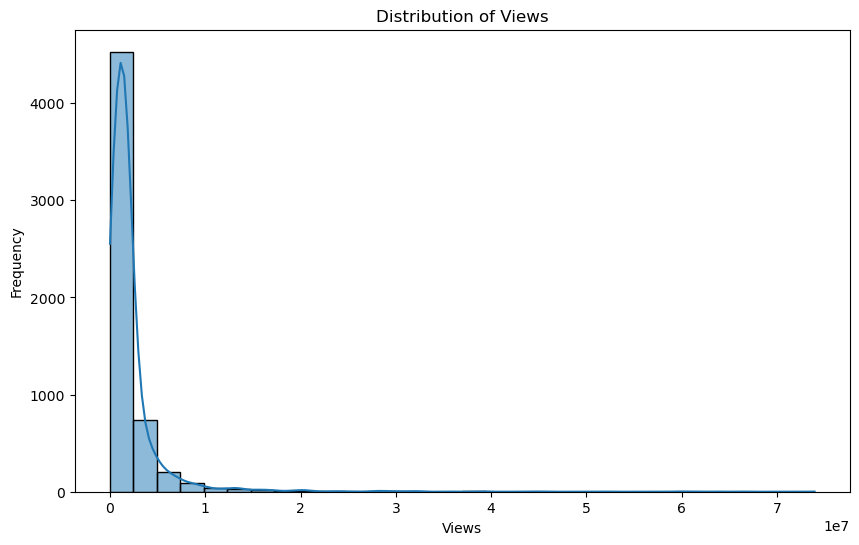

In [14]:
# Distribution plot of views
plt.figure(figsize=(10, 6))
sns.histplot(df['views'], bins=30, kde=True)
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

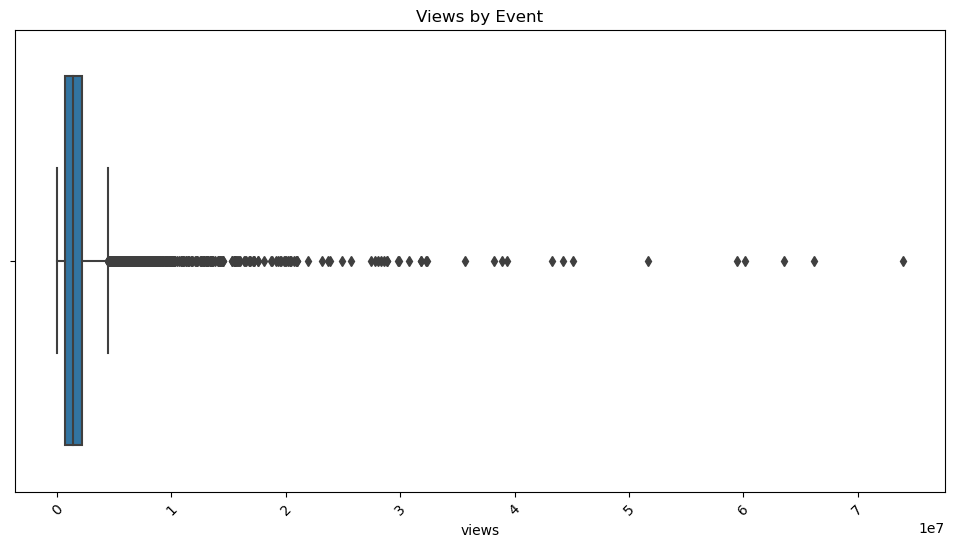

In [15]:
# Boxplot of views by event
plt.figure(figsize=(12, 6))
sns.boxplot(x='views', data=df)
plt.title('Views by Event')
plt.xticks(rotation=45)
plt.show()

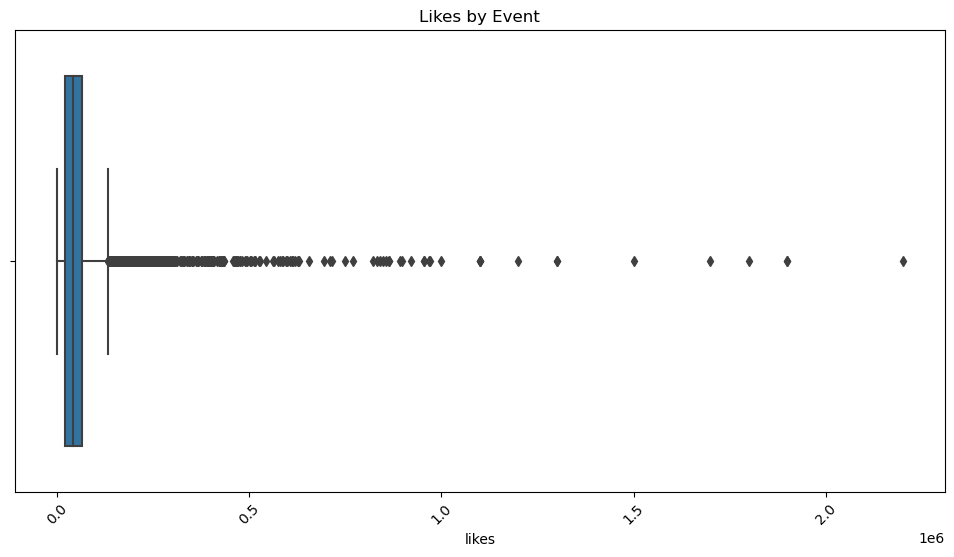

In [16]:
# Boxplot of views by event
plt.figure(figsize=(12, 6))
sns.boxplot(x='likes', data=df)
plt.title('Likes by Event')
plt.xticks(rotation=45)
plt.show()

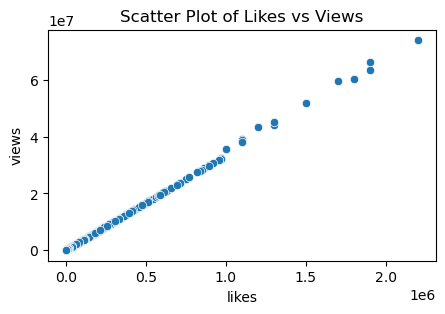

In [17]:
# Scatter plot of views vs likes
plt.figure(figsize=(5, 3))
sns.scatterplot(x='likes', y='views', data=df)
plt.title('Scatter Plot of Likes vs Views')
plt.show()

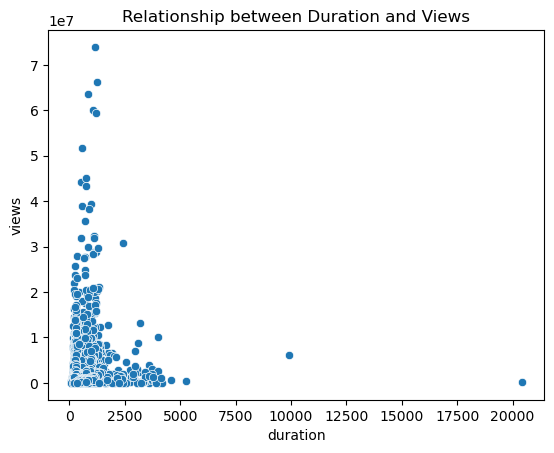

In [18]:
sns.scatterplot(x='duration', y='views', data=df)
plt.title('Relationship between Duration and Views')
plt.show()

In [19]:
# Handling Outliers for views
# Capping outliers
Q1 = df['views'].quantile(0.25)
Q3 = df['views'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['views'] = df['views'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

print(df.describe())


            talk_id      duration         views         likes
count   5701.000000   5701.000000  5.701000e+03  5.701000e+03
mean   26577.133135    706.021751  1.649773e+06  6.386154e+04
std    30530.857641    519.196825  1.279973e+06  1.098655e+05
min        1.000000     60.000000  4.560000e+02  1.300000e+01
25%     1660.000000    354.000000  6.859920e+05  2.000000e+04
50%    10368.000000    679.000000  1.405696e+06  4.200000e+04
75%    51783.000000    924.000000  2.189406e+06  6.500000e+04
max    98843.000000  20404.000000  4.444527e+06  2.200000e+06


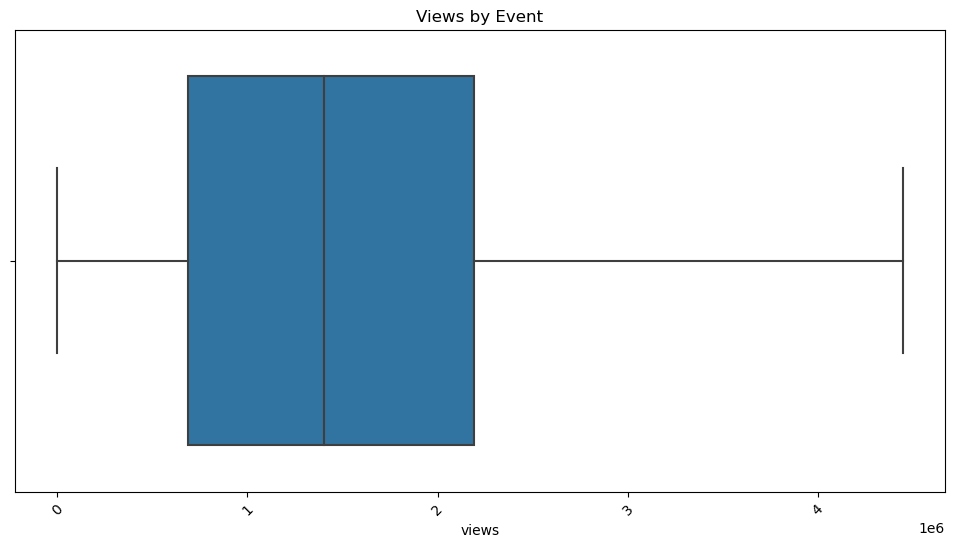

In [20]:
# Boxplot of views by event after handling outlier
plt.figure(figsize=(12, 6))
sns.boxplot(x='views', data=df)
plt.title('Views by Event')
plt.xticks(rotation=45)
plt.show()

In [21]:
# Handling Outliers for likes
# Capping outliers
Q1_likes = df['likes'].quantile(0.25)
Q3_likes = df['likes'].quantile(0.75)
IQR_likes = Q3_likes - Q1_likes
lower_bound_likes = Q1_likes - 1.5 * IQR_likes
upper_bound_likes = Q3_likes + 1.5 * IQR_likes
df['likes'] = df['likes'].apply(lambda x: upper_bound_likes if x > upper_bound_likes else (lower_bound_likes if x < lower_bound_likes else x))

print(df['likes'].describe())

count      5701.000000
mean      49031.164182
std       38251.009503
min          13.000000
25%       20000.000000
50%       42000.000000
75%       65000.000000
max      132500.000000
Name: likes, dtype: float64


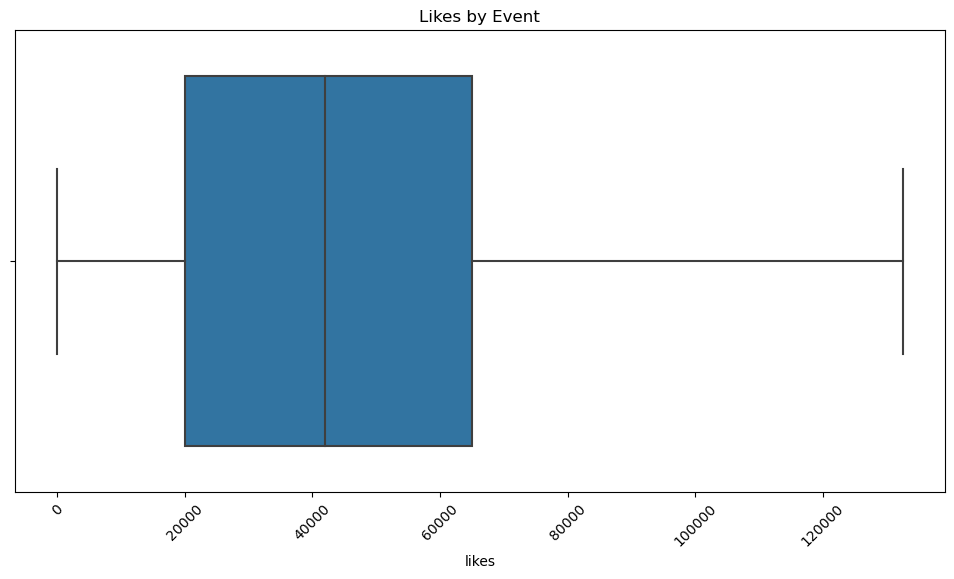

In [22]:
# Boxplot of likes by event
plt.figure(figsize=(12, 6))
sns.boxplot(x='likes', data=df)
plt.title('Likes by Event')
plt.xticks(rotation=45)
plt.show()

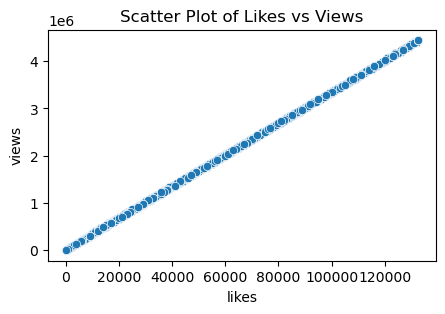

In [23]:
# Scatter plot of views vs likes
plt.figure(figsize=(5, 3))
sns.scatterplot(x='likes', y='views', data=df)
plt.title('Scatter Plot of Likes vs Views')
plt.show()

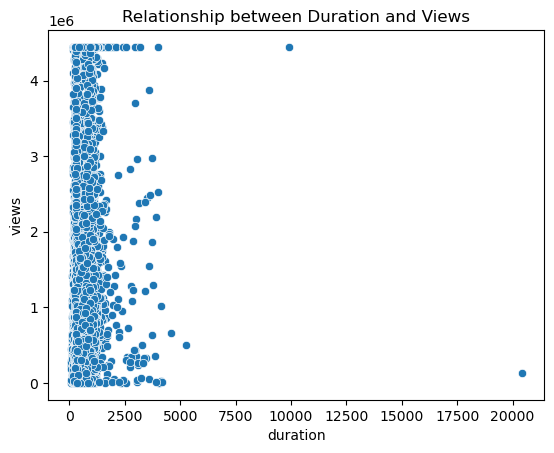

In [24]:
sns.scatterplot(x='duration', y='views', data=df)
plt.title('Relationship between Duration and Views')
plt.show()

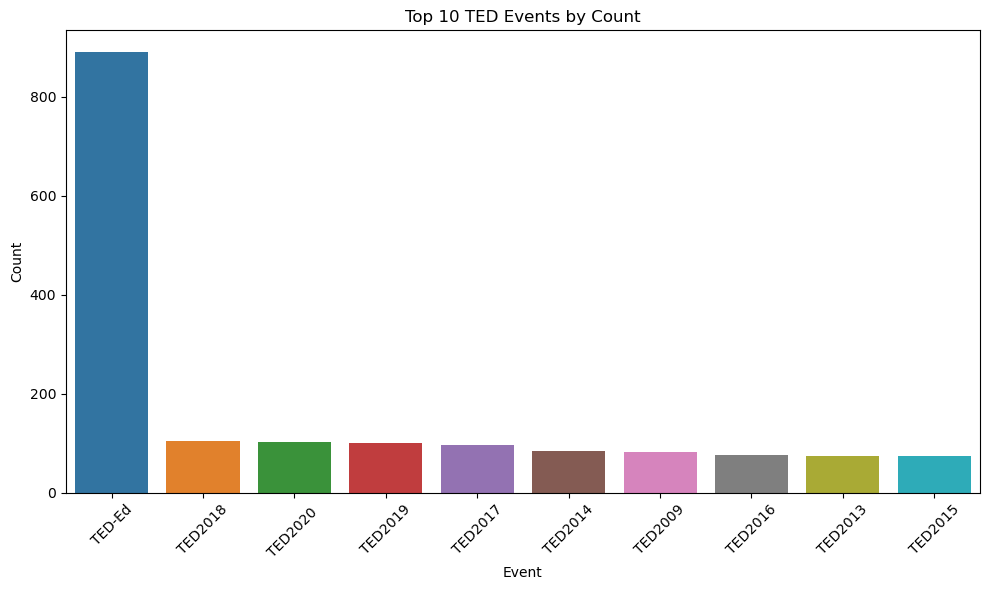

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='event', data=df, order=df['event'].value_counts().index[:10])
plt.title('Top 10 TED Events by Count')
plt.xlabel('Event')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
df.head()

,talk_id,title,speaker,recorded_date,published_date,event,duration,views,likes
0,1,Averting the climate crisis,Al Gore,2006-02-25,2006-06-27,TED2006,957,3681537.0,110000.0
1,7,Simplicity sells,David Pogue,2006-02-24,2006-06-27,TED2006,1266,2012797.0,60000.0
2,53,Greening the ghetto,Majora Carter,2006-02-26,2006-06-27,TED2006,1096,3006315.0,90000.0
3,92,The best stats you've ever seen,Hans Rosling,2006-02-22,2006-06-27,TED2006,1176,4444527.0,132500.0
4,66,Do schools kill creativity?,Sir Ken Robinson,2006-02-25,2006-06-27,TED2006,1151,4444527.0,132500.0


In [28]:
df['recorded_year'] = pd.to_datetime(df['recorded_date']).dt.year
df['published_year'] = pd.to_datetime(df['published_date']).dt.year

In [29]:
# Define features (X) and target variable (y)
X = df[['duration', 'likes',  'recorded_year', 'published_year']]  
y = df['views']  # Target variable

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)
y_pred

array([1783225.27935054, 1683973.51330872,   38077.063635  , ...,
       4444485.9066451 , 1281050.60678509,  412728.37126143])

In [33]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 90119817.49001874


In [34]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2}')

R-squared (R2): 0.9999442188472127


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [36]:
 # Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [37]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=4,
                           verbose=2
                          )
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   3.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   3.8s
[CV] END m

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   4.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   3.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_est

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [38]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=200)

In [39]:
# Best parameters and score
print('Best Parameters:', grid_search.best_params_)
print('Best CV Score:', grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Score: -83708731.17669103


In [40]:
y_pred_grid = best_model.predict(X_test)

In [41]:
# Calculate Mean Squared Error (MSE)
mse_grid = mean_squared_error(y_test, y_pred_grid)
print(f'Mean Squared Error (Grid Search): {mse_grid}')

Mean Squared Error (Grid Search): 82878377.01471633


In [42]:
# Calculate R-squared (coefficient of determination)
r2_grid = r2_score(y_test, y_pred_grid)
print(f'R-squared (Grid Search): {r2_grid}')

R-squared (Grid Search): 0.9999487010566624


In [43]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [44]:
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

svr.fit(X_train, y_train)

SVR()

In [45]:
y_pred_svr = svr.predict(X_test)

In [46]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"SVR Mean Squared Error (MSE): {mse_svr}")

SVR Mean Squared Error (MSE): 1675072269298.177


In [47]:
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR R-squared (R2): {r2_svr}")

SVR R-squared (R2): -0.03681370852433097


In [48]:
knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsRegressor()

In [49]:
y_pred_knn = knn.predict(X_test)

In [50]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"KNN Mean Squared Error (MSE): {mse_knn}")

r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNN R-squared (R2): {r2_knn}")

KNN Mean Squared Error (MSE): 86539032.8453303
KNN R-squared (R2): 0.9999464352331413


In [51]:
# Initialize the Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=10,
                                 min_samples_leaf=5,
                                 random_state=42
                                )

dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, random_state=42)

In [52]:
y_pred_dt = dt_model.predict(X_test)

In [53]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'Mean Squared Error (Decision Tree): {mse_dt}')

r2_dt = r2_score(y_test, y_pred_dt)
print(f'R-squared (Decision Tree): {r2_dt}')

Mean Squared Error (Decision Tree): 101606134.01437981
R-squared (Decision Tree): 0.9999371092014673


In [54]:
# Cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()  # Since cross_val_score gives negative MSE
print(f'Cross-Validated Mean Squared Error: {cv_mse}')

Cross-Validated Mean Squared Error: 83765054.76729727


In [55]:
# Initialize the final model with best parameters
final_model = RandomForestRegressor(max_depth=10,
                                    min_samples_leaf=1,
                                    min_samples_split=5,
                                    n_estimators=300
                                   )

In [56]:
final_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=300)

In [57]:
y_pred = final_model.predict(X_test)

In [58]:
final_mse = mean_squared_error(y_test, y_pred)
print(f'Final Mean Squared Error (MSE) on Test Set: {final_mse}')

Final Mean Squared Error (MSE) on Test Set: 82373072.10710254


In [59]:
final_r2 = r2_score(y_test, y_pred)
print(f'Final R-squared (R2) on Test Set: {final_r2}')

Final R-squared (R2) on Test Set: 0.9999490138234993


In [60]:
#Cross-Validation
cv_scores_f = cross_val_score(final_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_f= -cv_scores.mean()  # Since cross_val_score gives negative MSE
print(f'Cross-Validated Mean Squared Error: {cv_mse}')

Cross-Validated Mean Squared Error: 83765054.76729727
